In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [2]:
df=pd.read_csv('./Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
df.shape

(9990, 60)

In [4]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [5]:
df=df.drop(labels='filename',axis=1)

In [6]:
audio_recording='./Data/genres_original/country/country.00050.wav'
data , sr = librosa.load(audio_recording)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [7]:
data , sr = librosa.load(audio_recording)

In [8]:
librosa.load(audio_recording, sr=45600)

(array([ 0.04582627,  0.06254332,  0.0583379 , ..., -0.13857861,
        -0.11823352, -0.05911855], dtype=float32), 45600)

In [9]:
import IPython
IPython.display.Audio(data, rate=sr)

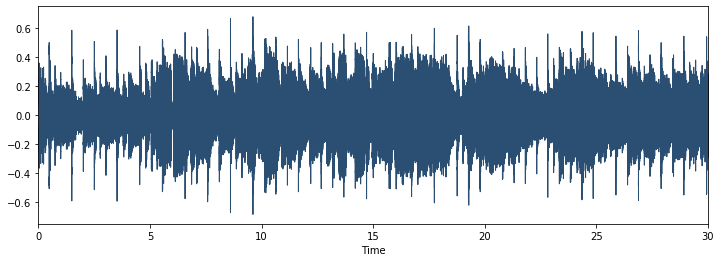

In [10]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data, color = "#2B4F72")
plt.show()

C:\Users\Me\Anaconda3\lib\site-packages\librosa\display.py:955: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


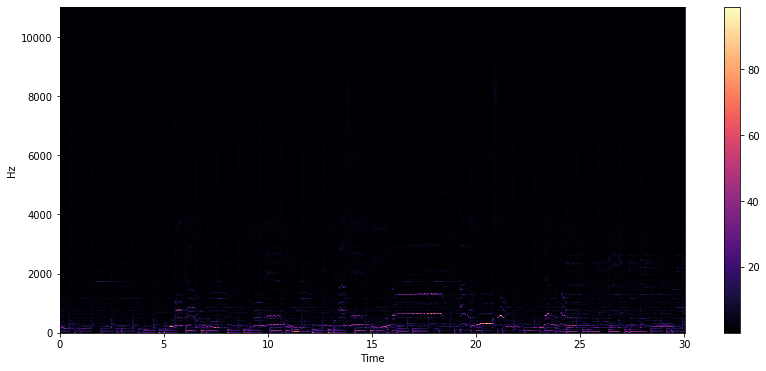

In [11]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

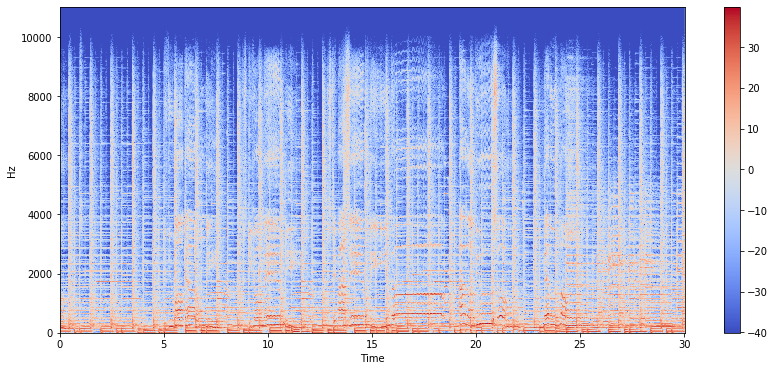

In [12]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

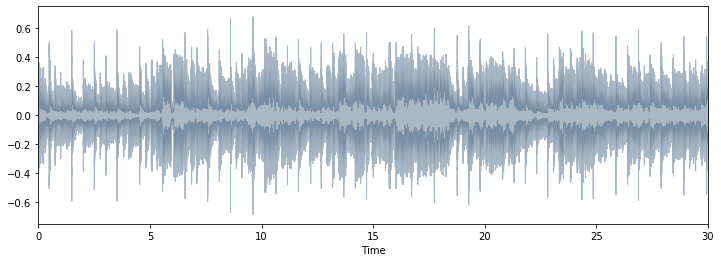

In [13]:
from sklearn.preprocessing import normalize
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sr, alpha=0.4, color="#2B4F72")

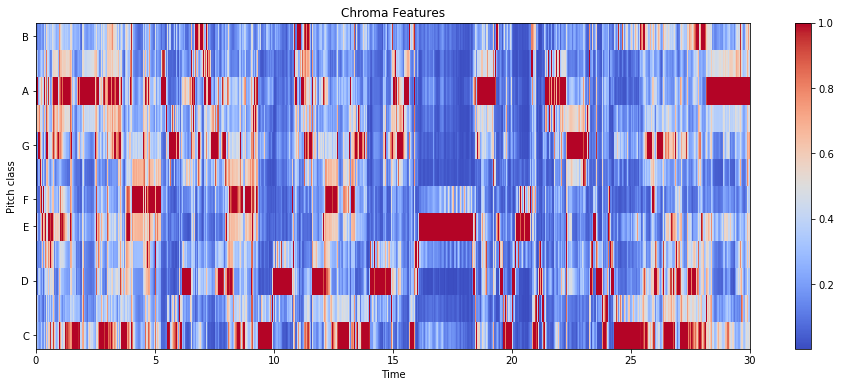

In [14]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma',cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

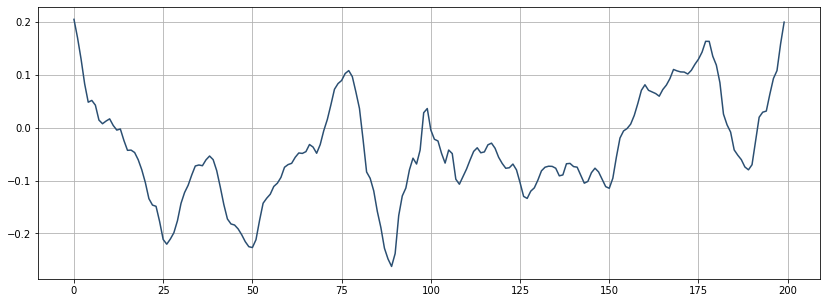

In [15]:
start=1000
end=1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end], color="#2B4F72")
plt.grid()

In [16]:
zero_cross_rate=librosa.zero_crossings(data[start:end],pad=False)
print("The number of zero-crossings is :",sum(zero_cross_rate))

The number of zero-crossings is : 8


In [17]:
class_list=df.iloc[:,-1]
convertor=LabelEncoder()

In [18]:
y=convertor.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [19]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [20]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform (np.array(df.iloc[:,:-1],dtype=float))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [34]:
len(y_train)

6693

In [35]:
len(y_test)

3297

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
def trainModel(model, epochs, optimizer):
    batch_size=128
    model.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics='accuracy'
                 )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=epochs, batch_size=batch_size)

In [24]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.Dataframe(history.history).plot(figsize=(12,6))
    plt.show()

In [25]:
model=keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation='softmax'),
])
print(model.summary())
model_history=trainModel(model=model, epochs=600, optimizer='adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               30208     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6

53/53 [==============================] - ETA: 0s - loss: 0.3309 - accuracy: 0.88 - ETA: 0s - loss: 0.2966 - accuracy: 0.89 - ETA: 0s - loss: 0.3161 - accuracy: 0.88 - ETA: 0s - loss: 0.3276 - accuracy: 0.88 - ETA: 0s - loss: 0.3200 - accuracy: 0.89 - ETA: 0s - loss: 0.3111 - accuracy: 0.89 - ETA: 0s - loss: 0.3095 - accuracy: 0.89 - ETA: 0s - loss: 0.3033 - accuracy: 0.89 - ETA: 0s - loss: 0.3026 - accuracy: 0.89 - 1s 12ms/step - loss: 0.3001 - accuracy: 0.8966 - val_loss: 0.4272 - val_accuracy: 0.8632
Epoch 12/600
53/53 [==============================] - ETA: 0s - loss: 0.1503 - accuracy: 0.93 - ETA: 0s - loss: 0.2393 - accuracy: 0.91 - ETA: 0s - loss: 0.2642 - accuracy: 0.90 - ETA: 0s - loss: 0.2783 - accuracy: 0.90 - ETA: 0s - loss: 0.2691 - accuracy: 0.90 - ETA: 0s - loss: 0.2771 - accuracy: 0.90 - ETA: 0s - loss: 0.2686 - accuracy: 0.90 - ETA: 0s - loss: 0.2699 - accuracy: 0.90 - ETA: 0s - loss: 0.2736 - accuracy: 0.90 - ETA: 0s - loss: 0.2756 - accuracy: 0.90 - ETA: 0s - loss: 0.

53/53 [==============================] - ETA: 0s - loss: 0.0770 - accuracy: 0.97 - ETA: 0s - loss: 0.1187 - accuracy: 0.96 - ETA: 0s - loss: 0.1131 - accuracy: 0.96 - ETA: 0s - loss: 0.1176 - accuracy: 0.96 - ETA: 0s - loss: 0.1195 - accuracy: 0.96 - ETA: 0s - loss: 0.1190 - accuracy: 0.96 - ETA: 0s - loss: 0.1183 - accuracy: 0.96 - ETA: 0s - loss: 0.1229 - accuracy: 0.96 - ETA: 0s - loss: 0.1213 - accuracy: 0.96 - ETA: 0s - loss: 0.1214 - accuracy: 0.95 - ETA: 0s - loss: 0.1211 - accuracy: 0.95 - ETA: 0s - loss: 0.1201 - accuracy: 0.96 - ETA: 0s - loss: 0.1199 - accuracy: 0.96 - 1s 15ms/step - loss: 0.1201 - accuracy: 0.9598 - val_loss: 0.3897 - val_accuracy: 0.8938
Epoch 24/600
53/53 [==============================] - ETA: 0s - loss: 0.1613 - accuracy: 0.94 - ETA: 0s - loss: 0.1012 - accuracy: 0.95 - ETA: 0s - loss: 0.1108 - accuracy: 0.96 - ETA: 0s - loss: 0.1092 - accuracy: 0.96 - ETA: 0s - loss: 0.1028 - accuracy: 0.96 - ETA: 0s - loss: 0.1052 - accuracy: 0.96 - ETA: 0s - loss: 0.

53/53 [==============================] - ETA: 0s - loss: 0.0731 - accuracy: 0.97 - ETA: 0s - loss: 0.0676 - accuracy: 0.97 - ETA: 0s - loss: 0.0742 - accuracy: 0.97 - ETA: 0s - loss: 0.0782 - accuracy: 0.97 - ETA: 0s - loss: 0.0762 - accuracy: 0.97 - ETA: 0s - loss: 0.0869 - accuracy: 0.97 - ETA: 0s - loss: 0.0839 - accuracy: 0.97 - ETA: 0s - loss: 0.0834 - accuracy: 0.97 - ETA: 0s - loss: 0.0832 - accuracy: 0.97 - ETA: 0s - loss: 0.0815 - accuracy: 0.97 - ETA: 0s - loss: 0.0790 - accuracy: 0.97 - ETA: 0s - loss: 0.0786 - accuracy: 0.97 - ETA: 0s - loss: 0.0775 - accuracy: 0.97 - 1s 16ms/step - loss: 0.0778 - accuracy: 0.9740 - val_loss: 0.4098 - val_accuracy: 0.8987
Epoch 36/600
53/53 [==============================] - ETA: 0s - loss: 0.0934 - accuracy: 0.98 - ETA: 0s - loss: 0.0811 - accuracy: 0.97 - ETA: 0s - loss: 0.0838 - accuracy: 0.97 - ETA: 0s - loss: 0.0749 - accuracy: 0.97 - ETA: 0s - loss: 0.0714 - accuracy: 0.97 - ETA: 0s - loss: 0.0763 - accuracy: 0.97 - ETA: 0s - loss: 0.

Epoch 47/600
53/53 [==============================] - ETA: 0s - loss: 0.0287 - accuracy: 0.99 - ETA: 0s - loss: 0.0488 - accuracy: 0.98 - ETA: 0s - loss: 0.0573 - accuracy: 0.98 - ETA: 0s - loss: 0.0594 - accuracy: 0.98 - ETA: 0s - loss: 0.0579 - accuracy: 0.98 - ETA: 0s - loss: 0.0622 - accuracy: 0.98 - ETA: 0s - loss: 0.0652 - accuracy: 0.98 - ETA: 0s - loss: 0.0643 - accuracy: 0.98 - ETA: 0s - loss: 0.0646 - accuracy: 0.98 - ETA: 0s - loss: 0.0645 - accuracy: 0.98 - ETA: 0s - loss: 0.0639 - accuracy: 0.98 - ETA: 0s - loss: 0.0634 - accuracy: 0.98 - ETA: 0s - loss: 0.0643 - accuracy: 0.98 - 1s 16ms/step - loss: 0.0634 - accuracy: 0.9810 - val_loss: 0.3602 - val_accuracy: 0.9130
Epoch 48/600
53/53 [==============================] - ETA: 0s - loss: 0.0516 - accuracy: 0.98 - ETA: 0s - loss: 0.0406 - accuracy: 0.98 - ETA: 0s - loss: 0.0575 - accuracy: 0.97 - ETA: 0s - loss: 0.0616 - accuracy: 0.97 - ETA: 0s - loss: 0.0689 - accuracy: 0.97 - ETA: 0s - loss: 0.0745 - accuracy: 0.97 - ETA: 

53/53 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.97 - ETA: 0s - loss: 0.0572 - accuracy: 0.97 - ETA: 0s - loss: 0.0458 - accuracy: 0.98 - ETA: 0s - loss: 0.0408 - accuracy: 0.98 - ETA: 0s - loss: 0.0441 - accuracy: 0.98 - ETA: 0s - loss: 0.0457 - accuracy: 0.98 - ETA: 0s - loss: 0.0513 - accuracy: 0.98 - ETA: 0s - loss: 0.0528 - accuracy: 0.98 - ETA: 0s - loss: 0.0504 - accuracy: 0.98 - ETA: 0s - loss: 0.0508 - accuracy: 0.98 - ETA: 0s - loss: 0.0545 - accuracy: 0.98 - ETA: 0s - loss: 0.0533 - accuracy: 0.98 - ETA: 0s - loss: 0.0526 - accuracy: 0.98 - 1s 15ms/step - loss: 0.0524 - accuracy: 0.9824 - val_loss: 0.4010 - val_accuracy: 0.9075
Epoch 60/600
53/53 [==============================] - ETA: 0s - loss: 0.0184 - accuracy: 0.99 - ETA: 0s - loss: 0.0461 - accuracy: 0.98 - ETA: 0s - loss: 0.0529 - accuracy: 0.98 - ETA: 0s - loss: 0.0514 - accuracy: 0.98 - ETA: 0s - loss: 0.0526 - accuracy: 0.98 - ETA: 0s - loss: 0.0522 - accuracy: 0.98 - ETA: 0s - loss: 0.

Epoch 71/600
53/53 [==============================] - ETA: 0s - loss: 0.0186 - accuracy: 0.99 - ETA: 0s - loss: 0.0353 - accuracy: 0.98 - ETA: 0s - loss: 0.0391 - accuracy: 0.98 - ETA: 0s - loss: 0.0344 - accuracy: 0.98 - ETA: 0s - loss: 0.0386 - accuracy: 0.98 - ETA: 0s - loss: 0.0373 - accuracy: 0.98 - ETA: 0s - loss: 0.0395 - accuracy: 0.98 - ETA: 0s - loss: 0.0412 - accuracy: 0.98 - ETA: 0s - loss: 0.0396 - accuracy: 0.98 - ETA: 0s - loss: 0.0391 - accuracy: 0.98 - ETA: 0s - loss: 0.0396 - accuracy: 0.98 - ETA: 0s - loss: 0.0423 - accuracy: 0.98 - ETA: 0s - loss: 0.0419 - accuracy: 0.98 - ETA: 0s - loss: 0.0434 - accuracy: 0.98 - 1s 16ms/step - loss: 0.0435 - accuracy: 0.9855 - val_loss: 0.3813 - val_accuracy: 0.9133
Epoch 72/600
53/53 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 1.00 - ETA: 0s - loss: 0.0324 - accuracy: 0.99 - ETA: 0s - loss: 0.0412 - accuracy: 0.98 - ETA: 0s - loss: 0.0406 - accuracy: 0.98 - ETA: 0s - loss: 0.0426 - accuracy: 0.98 - ETA: 

53/53 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 1.00 - ETA: 0s - loss: 0.0396 - accuracy: 0.98 - ETA: 0s - loss: 0.0399 - accuracy: 0.98 - ETA: 0s - loss: 0.0486 - accuracy: 0.98 - ETA: 0s - loss: 0.0465 - accuracy: 0.98 - ETA: 0s - loss: 0.0482 - accuracy: 0.98 - ETA: 0s - loss: 0.0470 - accuracy: 0.98 - ETA: 0s - loss: 0.0458 - accuracy: 0.98 - ETA: 0s - loss: 0.0441 - accuracy: 0.98 - ETA: 0s - loss: 0.0431 - accuracy: 0.98 - ETA: 0s - loss: 0.0444 - accuracy: 0.98 - ETA: 0s - loss: 0.0432 - accuracy: 0.98 - 1s 15ms/step - loss: 0.0442 - accuracy: 0.9855 - val_loss: 0.3802 - val_accuracy: 0.9190
Epoch 84/600
53/53 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.98 - ETA: 0s - loss: 0.0412 - accuracy: 0.98 - ETA: 0s - loss: 0.0459 - accuracy: 0.98 - ETA: 0s - loss: 0.0445 - accuracy: 0.98 - ETA: 0s - loss: 0.0440 - accuracy: 0.98 - ETA: 0s - loss: 0.0458 - accuracy: 0.98 - ETA: 0s - loss: 0.0441 - accuracy: 0.98 - ETA: 0s - loss: 0.

53/53 [==============================] - ETA: 0s - loss: 0.0251 - accuracy: 0.99 - ETA: 0s - loss: 0.0161 - accuracy: 0.99 - ETA: 0s - loss: 0.0203 - accuracy: 0.99 - ETA: 0s - loss: 0.0185 - accuracy: 0.99 - ETA: 0s - loss: 0.0206 - accuracy: 0.99 - ETA: 0s - loss: 0.0231 - accuracy: 0.99 - ETA: 0s - loss: 0.0240 - accuracy: 0.99 - ETA: 0s - loss: 0.0228 - accuracy: 0.99 - ETA: 0s - loss: 0.0224 - accuracy: 0.99 - ETA: 0s - loss: 0.0241 - accuracy: 0.99 - ETA: 0s - loss: 0.0231 - accuracy: 0.99 - 1s 13ms/step - loss: 0.0242 - accuracy: 0.9909 - val_loss: 0.4182 - val_accuracy: 0.9154
Epoch 95/600
53/53 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.99 - ETA: 0s - loss: 0.0418 - accuracy: 0.98 - ETA: 0s - loss: 0.0330 - accuracy: 0.99 - ETA: 0s - loss: 0.0336 - accuracy: 0.99 - ETA: 0s - loss: 0.0320 - accuracy: 0.99 - ETA: 0s - loss: 0.0334 - accuracy: 0.99 - ETA: 0s - loss: 0.0307 - accuracy: 0.99 - ETA: 0s - loss: 0.0308 - accuracy: 0.99 - ETA: 0s - loss: 0.

53/53 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 1.00 - ETA: 0s - loss: 0.0234 - accuracy: 0.99 - ETA: 0s - loss: 0.0242 - accuracy: 0.99 - ETA: 0s - loss: 0.0392 - accuracy: 0.98 - ETA: 0s - loss: 0.0336 - accuracy: 0.98 - ETA: 0s - loss: 0.0316 - accuracy: 0.99 - ETA: 0s - loss: 0.0283 - accuracy: 0.99 - ETA: 0s - loss: 0.0285 - accuracy: 0.99 - ETA: 0s - loss: 0.0268 - accuracy: 0.99 - ETA: 0s - loss: 0.0281 - accuracy: 0.99 - ETA: 0s - loss: 0.0268 - accuracy: 0.99 - ETA: 0s - loss: 0.0264 - accuracy: 0.99 - 1s 15ms/step - loss: 0.0270 - accuracy: 0.9924 - val_loss: 0.4048 - val_accuracy: 0.9199
Epoch 106/600
53/53 [==============================] - ETA: 0s - loss: 0.0523 - accuracy: 0.97 - ETA: 0s - loss: 0.0331 - accuracy: 0.98 - ETA: 0s - loss: 0.0257 - accuracy: 0.99 - ETA: 0s - loss: 0.0266 - accuracy: 0.99 - ETA: 0s - loss: 0.0247 - accuracy: 0.99 - ETA: 0s - loss: 0.0258 - accuracy: 0.99 - ETA: 0s - loss: 0.0311 - accuracy: 0.98 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.99 - ETA: 0s - loss: 0.0067 - accuracy: 0.99 - ETA: 0s - loss: 0.0192 - accuracy: 0.99 - ETA: 0s - loss: 0.0277 - accuracy: 0.99 - ETA: 0s - loss: 0.0242 - accuracy: 0.99 - ETA: 0s - loss: 0.0249 - accuracy: 0.99 - ETA: 0s - loss: 0.0241 - accuracy: 0.99 - ETA: 0s - loss: 0.0244 - accuracy: 0.99 - ETA: 0s - loss: 0.0246 - accuracy: 0.99 - ETA: 0s - loss: 0.0243 - accuracy: 0.99 - ETA: 0s - loss: 0.0260 - accuracy: 0.99 - ETA: 0s - loss: 0.0259 - accuracy: 0.99 - ETA: 0s - loss: 0.0253 - accuracy: 0.99 - ETA: 0s - loss: 0.0248 - accuracy: 0.99 - ETA: 0s - loss: 0.0238 - accuracy: 0.99 - ETA: 0s - loss: 0.0234 - accuracy: 0.99 - 1s 20ms/step - loss: 0.0234 - accuracy: 0.9922 - val_loss: 0.4144 - val_accuracy: 0.9184
Epoch 117/600
53/53 [==============================] - ETA: 0s - loss: 0.0053 - accuracy: 1.00 - ETA: 0s - loss: 0.0153 - accuracy: 0.99 - ETA: 0s - loss: 0.0153 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0347 - accuracy: 0.99 - ETA: 0s - loss: 0.0268 - accuracy: 0.99 - ETA: 0s - loss: 0.0184 - accuracy: 0.99 - ETA: 0s - loss: 0.0201 - accuracy: 0.99 - ETA: 0s - loss: 0.0223 - accuracy: 0.99 - ETA: 0s - loss: 0.0251 - accuracy: 0.99 - ETA: 0s - loss: 0.0229 - accuracy: 0.99 - ETA: 0s - loss: 0.0223 - accuracy: 0.99 - ETA: 0s - loss: 0.0224 - accuracy: 0.99 - ETA: 0s - loss: 0.0216 - accuracy: 0.99 - ETA: 0s - loss: 0.0217 - accuracy: 0.99 - ETA: 0s - loss: 0.0210 - accuracy: 0.99 - ETA: 0s - loss: 0.0226 - accuracy: 0.99 - ETA: 0s - loss: 0.0252 - accuracy: 0.99 - 1s 17ms/step - loss: 0.0251 - accuracy: 0.9915 - val_loss: 0.4224 - val_accuracy: 0.9142
Epoch 127/600
53/53 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.00 - ETA: 0s - loss: 0.0073 - accuracy: 0.99 - ETA: 0s - loss: 0.0097 - accuracy: 0.99 - ETA: 0s - loss: 0.0184 - accuracy: 0.99 - ETA: 0s - loss: 0.0186 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0462 - accuracy: 0.98 - ETA: 0s - loss: 0.0327 - accuracy: 0.99 - ETA: 0s - loss: 0.0290 - accuracy: 0.99 - ETA: 0s - loss: 0.0245 - accuracy: 0.99 - ETA: 0s - loss: 0.0257 - accuracy: 0.99 - ETA: 0s - loss: 0.0247 - accuracy: 0.99 - ETA: 0s - loss: 0.0245 - accuracy: 0.99 - ETA: 0s - loss: 0.0248 - accuracy: 0.99 - 1s 10ms/step - loss: 0.0235 - accuracy: 0.9931 - val_loss: 0.3913 - val_accuracy: 0.9169
Epoch 138/600
53/53 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 1.00 - ETA: 0s - loss: 0.0286 - accuracy: 0.99 - ETA: 0s - loss: 0.0331 - accuracy: 0.99 - ETA: 0s - loss: 0.0398 - accuracy: 0.99 - ETA: 0s - loss: 0.0410 - accuracy: 0.99 - ETA: 0s - loss: 0.0402 - accuracy: 0.98 - ETA: 0s - loss: 0.0374 - accuracy: 0.98 - 0s 8ms/step - loss: 0.0350 - accuracy: 0.9900 - val_loss: 0.3682 - val_accuracy: 0.9239
Epoch 139/600
53/53 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 1.00 - 

53/53 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 1.00 - ETA: 0s - loss: 0.0159 - accuracy: 0.99 - ETA: 0s - loss: 0.0181 - accuracy: 0.99 - ETA: 0s - loss: 0.0192 - accuracy: 0.99 - ETA: 0s - loss: 0.0203 - accuracy: 0.99 - ETA: 0s - loss: 0.0236 - accuracy: 0.99 - ETA: 0s - loss: 0.0281 - accuracy: 0.99 - ETA: 0s - loss: 0.0282 - accuracy: 0.99 - ETA: 0s - loss: 0.0359 - accuracy: 0.99 - ETA: 0s - loss: 0.0344 - accuracy: 0.99 - ETA: 0s - loss: 0.0342 - accuracy: 0.99 - ETA: 0s - loss: 0.0377 - accuracy: 0.99 - 1s 15ms/step - loss: 0.0370 - accuracy: 0.9900 - val_loss: 0.4407 - val_accuracy: 0.9126
Epoch 151/600
53/53 [==============================] - ETA: 0s - loss: 0.0643 - accuracy: 0.98 - ETA: 0s - loss: 0.0735 - accuracy: 0.97 - ETA: 0s - loss: 0.0564 - accuracy: 0.98 - ETA: 0s - loss: 0.0557 - accuracy: 0.98 - ETA: 0s - loss: 0.0556 - accuracy: 0.98 - ETA: 0s - loss: 0.0512 - accuracy: 0.98 - ETA: 0s - loss: 0.0471 - accuracy: 0.98 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 1.00 - ETA: 0s - loss: 0.0150 - accuracy: 0.99 - ETA: 0s - loss: 0.0168 - accuracy: 0.99 - ETA: 0s - loss: 0.0228 - accuracy: 0.99 - ETA: 0s - loss: 0.0220 - accuracy: 0.99 - ETA: 0s - loss: 0.0230 - accuracy: 0.99 - ETA: 0s - loss: 0.0241 - accuracy: 0.99 - ETA: 0s - loss: 0.0261 - accuracy: 0.99 - ETA: 0s - loss: 0.0244 - accuracy: 0.99 - ETA: 0s - loss: 0.0255 - accuracy: 0.99 - ETA: 0s - loss: 0.0246 - accuracy: 0.99 - 1s 14ms/step - loss: 0.0238 - accuracy: 0.9919 - val_loss: 0.3954 - val_accuracy: 0.9236
Epoch 163/600
53/53 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.99 - ETA: 0s - loss: 0.0131 - accuracy: 0.99 - ETA: 0s - loss: 0.0190 - accuracy: 0.99 - ETA: 0s - loss: 0.0187 - accuracy: 0.99 - ETA: 0s - loss: 0.0187 - accuracy: 0.99 - ETA: 0s - loss: 0.0209 - accuracy: 0.99 - ETA: 0s - loss: 0.0231 - accuracy: 0.99 - ETA: 0s - loss: 0.0261 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 1.00 - ETA: 0s - loss: 0.0136 - accuracy: 0.99 - ETA: 0s - loss: 0.0167 - accuracy: 0.99 - ETA: 0s - loss: 0.0236 - accuracy: 0.99 - ETA: 0s - loss: 0.0245 - accuracy: 0.99 - ETA: 0s - loss: 0.0260 - accuracy: 0.99 - ETA: 0s - loss: 0.0259 - accuracy: 0.99 - ETA: 0s - loss: 0.0237 - accuracy: 0.99 - ETA: 0s - loss: 0.0251 - accuracy: 0.99 - ETA: 0s - loss: 0.0234 - accuracy: 0.99 - ETA: 0s - loss: 0.0234 - accuracy: 0.99 - 1s 13ms/step - loss: 0.0229 - accuracy: 0.9948 - val_loss: 0.3939 - val_accuracy: 0.9248
Epoch 176/600
53/53 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 1.00 - ETA: 0s - loss: 0.0256 - accuracy: 0.99 - ETA: 0s - loss: 0.0282 - accuracy: 0.99 - ETA: 0s - loss: 0.0305 - accuracy: 0.99 - ETA: 0s - loss: 0.0262 - accuracy: 0.99 - ETA: 0s - loss: 0.0242 - accuracy: 0.99 - ETA: 0s - loss: 0.0269 - accuracy: 0.99 - ETA: 0s - loss: 0.0259 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0655 - accuracy: 0.97 - ETA: 0s - loss: 0.0171 - accuracy: 0.99 - ETA: 0s - loss: 0.0113 - accuracy: 0.99 - ETA: 0s - loss: 0.0129 - accuracy: 0.99 - ETA: 0s - loss: 0.0126 - accuracy: 0.99 - ETA: 0s - loss: 0.0143 - accuracy: 0.99 - ETA: 0s - loss: 0.0153 - accuracy: 0.99 - ETA: 0s - loss: 0.0146 - accuracy: 0.99 - ETA: 0s - loss: 0.0154 - accuracy: 0.99 - ETA: 0s - loss: 0.0141 - accuracy: 0.99 - ETA: 0s - loss: 0.0149 - accuracy: 0.99 - ETA: 0s - loss: 0.0156 - accuracy: 0.99 - ETA: 0s - loss: 0.0155 - accuracy: 0.99 - ETA: 0s - loss: 0.0171 - accuracy: 0.99 - 1s 16ms/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.4645 - val_accuracy: 0.9233
Epoch 189/600
53/53 [==============================] - ETA: 0s - loss: 0.0092 - accuracy: 0.99 - ETA: 0s - loss: 0.0172 - accuracy: 0.99 - ETA: 0s - loss: 0.0137 - accuracy: 0.99 - ETA: 0s - loss: 0.0233 - accuracy: 0.99 - ETA: 0s - loss: 0.0226 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.99 - ETA: 0s - loss: 0.0141 - accuracy: 0.99 - ETA: 0s - loss: 0.0136 - accuracy: 0.99 - ETA: 0s - loss: 0.0122 - accuracy: 0.99 - ETA: 0s - loss: 0.0160 - accuracy: 0.99 - ETA: 0s - loss: 0.0150 - accuracy: 0.99 - ETA: 0s - loss: 0.0212 - accuracy: 0.99 - ETA: 0s - loss: 0.0210 - accuracy: 0.99 - ETA: 0s - loss: 0.0199 - accuracy: 0.99 - ETA: 0s - loss: 0.0188 - accuracy: 0.99 - ETA: 0s - loss: 0.0193 - accuracy: 0.99 - ETA: 0s - loss: 0.0197 - accuracy: 0.99 - ETA: 0s - loss: 0.0206 - accuracy: 0.99 - ETA: 0s - loss: 0.0204 - accuracy: 0.99 - 1s 17ms/step - loss: 0.0219 - accuracy: 0.9927 - val_loss: 0.4139 - val_accuracy: 0.9236
Epoch 200/600
53/53 [==============================] - ETA: 0s - loss: 0.0381 - accuracy: 0.99 - ETA: 0s - loss: 0.0255 - accuracy: 0.99 - ETA: 0s - loss: 0.0466 - accuracy: 0.98 - ETA: 0s - loss: 0.0452 - accuracy: 0.98 - ETA: 0s - loss: 0.0398 - accuracy: 0.98 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 1.00 - ETA: 0s - loss: 0.0125 - accuracy: 0.99 - ETA: 0s - loss: 0.0125 - accuracy: 0.99 - ETA: 0s - loss: 0.0111 - accuracy: 0.99 - ETA: 0s - loss: 0.0111 - accuracy: 0.99 - ETA: 0s - loss: 0.0131 - accuracy: 0.99 - ETA: 0s - loss: 0.0131 - accuracy: 0.99 - ETA: 0s - loss: 0.0144 - accuracy: 0.99 - ETA: 0s - loss: 0.0135 - accuracy: 0.99 - ETA: 0s - loss: 0.0133 - accuracy: 0.99 - ETA: 0s - loss: 0.0165 - accuracy: 0.99 - ETA: 0s - loss: 0.0171 - accuracy: 0.99 - ETA: 0s - loss: 0.0204 - accuracy: 0.99 - ETA: 0s - loss: 0.0216 - accuracy: 0.99 - 1s 16ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.4512 - val_accuracy: 0.9217
Epoch 211/600
53/53 [==============================] - ETA: 1s - loss: 0.0068 - accuracy: 0.99 - ETA: 0s - loss: 0.0177 - accuracy: 0.99 - ETA: 0s - loss: 0.0117 - accuracy: 0.99 - ETA: 0s - loss: 0.0130 - accuracy: 0.99 - ETA: 0s - loss: 0.0178 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0758 - accuracy: 0.96 - ETA: 0s - loss: 0.0215 - accuracy: 0.99 - ETA: 0s - loss: 0.0180 - accuracy: 0.99 - ETA: 0s - loss: 0.0238 - accuracy: 0.99 - ETA: 0s - loss: 0.0240 - accuracy: 0.99 - ETA: 0s - loss: 0.0257 - accuracy: 0.99 - ETA: 0s - loss: 0.0265 - accuracy: 0.99 - ETA: 0s - loss: 0.0274 - accuracy: 0.99 - ETA: 0s - loss: 0.0264 - accuracy: 0.99 - ETA: 0s - loss: 0.0260 - accuracy: 0.99 - ETA: 0s - loss: 0.0262 - accuracy: 0.99 - ETA: 0s - loss: 0.0251 - accuracy: 0.99 - 1s 15ms/step - loss: 0.0250 - accuracy: 0.9918 - val_loss: 0.4117 - val_accuracy: 0.9199
Epoch 222/600
53/53 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.98 - ETA: 0s - loss: 0.0168 - accuracy: 0.99 - ETA: 0s - loss: 0.0246 - accuracy: 0.99 - ETA: 0s - loss: 0.0196 - accuracy: 0.99 - ETA: 0s - loss: 0.0238 - accuracy: 0.99 - ETA: 0s - loss: 0.0244 - accuracy: 0.99 - ETA: 0s - loss: 0.0226 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 0.99 - ETA: 0s - loss: 0.0073 - accuracy: 0.99 - ETA: 0s - loss: 0.0093 - accuracy: 0.99 - ETA: 0s - loss: 0.0125 - accuracy: 0.99 - ETA: 0s - loss: 0.0113 - accuracy: 0.99 - ETA: 0s - loss: 0.0137 - accuracy: 0.99 - ETA: 0s - loss: 0.0123 - accuracy: 0.99 - ETA: 0s - loss: 0.0158 - accuracy: 0.99 - ETA: 0s - loss: 0.0154 - accuracy: 0.99 - ETA: 0s - loss: 0.0153 - accuracy: 0.99 - ETA: 0s - loss: 0.0152 - accuracy: 0.99 - ETA: 0s - loss: 0.0145 - accuracy: 0.99 - 1s 14ms/step - loss: 0.0141 - accuracy: 0.9951 - val_loss: 0.4343 - val_accuracy: 0.9211
Epoch 235/600
53/53 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.99 - ETA: 0s - loss: 0.0113 - accuracy: 0.99 - ETA: 0s - loss: 0.0145 - accuracy: 0.99 - ETA: 0s - loss: 0.0117 - accuracy: 0.99 - ETA: 0s - loss: 0.0108 - accuracy: 0.99 - ETA: 0s - loss: 0.0105 - accuracy: 0.99 - ETA: 0s - loss: 0.0099 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.99 - ETA: 0s - loss: 0.0284 - accuracy: 0.98 - ETA: 0s - loss: 0.0329 - accuracy: 0.99 - ETA: 0s - loss: 0.0299 - accuracy: 0.99 - ETA: 0s - loss: 0.0313 - accuracy: 0.99 - ETA: 0s - loss: 0.0279 - accuracy: 0.99 - ETA: 0s - loss: 0.0263 - accuracy: 0.99 - ETA: 0s - loss: 0.0254 - accuracy: 0.99 - ETA: 0s - loss: 0.0262 - accuracy: 0.99 - ETA: 0s - loss: 0.0252 - accuracy: 0.99 - ETA: 0s - loss: 0.0233 - accuracy: 0.99 - 1s 14ms/step - loss: 0.0223 - accuracy: 0.9939 - val_loss: 0.4517 - val_accuracy: 0.9208
Epoch 247/600
53/53 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 1.00 - ETA: 0s - loss: 0.0189 - accuracy: 0.99 - ETA: 0s - loss: 0.0177 - accuracy: 0.99 - ETA: 0s - loss: 0.0148 - accuracy: 0.99 - ETA: 0s - loss: 0.0138 - accuracy: 0.99 - ETA: 0s - loss: 0.0114 - accuracy: 0.99 - ETA: 0s - loss: 0.0116 - accuracy: 0.99 - ETA: 0s - loss: 0.0148 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 1.00 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0117 - accuracy: 0.99 - ETA: 0s - loss: 0.0173 - accuracy: 0.99 - ETA: 0s - loss: 0.0190 - accuracy: 0.99 - ETA: 0s - loss: 0.0200 - accuracy: 0.99 - ETA: 0s - loss: 0.0189 - accuracy: 0.99 - ETA: 0s - loss: 0.0194 - accuracy: 0.99 - ETA: 0s - loss: 0.0196 - accuracy: 0.99 - ETA: 0s - loss: 0.0216 - accuracy: 0.99 - ETA: 0s - loss: 0.0224 - accuracy: 0.99 - 1s 14ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.4073 - val_accuracy: 0.9239
Epoch 260/600
53/53 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.00 - ETA: 0s - loss: 0.0366 - accuracy: 0.99 - ETA: 0s - loss: 0.0333 - accuracy: 0.99 - ETA: 0s - loss: 0.0285 - accuracy: 0.99 - ETA: 0s - loss: 0.0238 - accuracy: 0.99 - ETA: 0s - loss: 0.0225 - accuracy: 0.99 - ETA: 0s - loss: 0.0197 - accuracy: 0.99 - ETA: 0s - loss: 0.0196 - accuracy: 0.99 - ETA: 0s - loss: 0

Epoch 272/600
53/53 [==============================] - ETA: 0s - loss: 0.0459 - accuracy: 0.98 - ETA: 0s - loss: 0.0308 - accuracy: 0.98 - ETA: 0s - loss: 0.0226 - accuracy: 0.99 - ETA: 0s - loss: 0.0182 - accuracy: 0.99 - ETA: 0s - loss: 0.0162 - accuracy: 0.99 - ETA: 0s - loss: 0.0136 - accuracy: 0.99 - ETA: 0s - loss: 0.0206 - accuracy: 0.99 - ETA: 0s - loss: 0.0193 - accuracy: 0.99 - ETA: 0s - loss: 0.0193 - accuracy: 0.99 - ETA: 0s - loss: 0.0183 - accuracy: 0.99 - ETA: 0s - loss: 0.0172 - accuracy: 0.99 - 1s 13ms/step - loss: 0.0168 - accuracy: 0.9940 - val_loss: 0.4370 - val_accuracy: 0.9236
Epoch 273/600
53/53 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.99 - ETA: 0s - loss: 0.0213 - accuracy: 0.99 - ETA: 0s - loss: 0.0256 - accuracy: 0.98 - ETA: 0s - loss: 0.0247 - accuracy: 0.99 - ETA: 0s - loss: 0.0318 - accuracy: 0.98 - ETA: 0s - loss: 0.0306 - accuracy: 0.99 - ETA: 0s - loss: 0.0307 - accuracy: 0.99 - ETA: 0s - loss: 0.0316 - accuracy: 0.99 - ETA

53/53 [==============================] - ETA: 0s - loss: 1.8666e-04 - accuracy: 1.00 - ETA: 0s - loss: 0.0156 - accuracy: 0.9948   - ETA: 0s - loss: 0.0202 - accuracy: 0.99 - ETA: 0s - loss: 0.0164 - accuracy: 0.99 - ETA: 0s - loss: 0.0135 - accuracy: 0.99 - ETA: 0s - loss: 0.0120 - accuracy: 0.99 - ETA: 0s - loss: 0.0113 - accuracy: 0.99 - ETA: 0s - loss: 0.0108 - accuracy: 0.99 - ETA: 0s - loss: 0.0101 - accuracy: 0.99 - ETA: 0s - loss: 0.0103 - accuracy: 0.99 - ETA: 0s - loss: 0.0118 - accuracy: 0.99 - 1s 13ms/step - loss: 0.0118 - accuracy: 0.9963 - val_loss: 0.4527 - val_accuracy: 0.9278
Epoch 286/600
53/53 [==============================] - ETA: 0s - loss: 6.9495e-05 - accuracy: 1.00 - ETA: 0s - loss: 0.0111 - accuracy: 0.9974   - ETA: 0s - loss: 0.0096 - accuracy: 0.99 - ETA: 0s - loss: 0.0089 - accuracy: 0.99 - ETA: 0s - loss: 0.0160 - accuracy: 0.99 - ETA: 0s - loss: 0.0163 - accuracy: 0.99 - ETA: 0s - loss: 0.0145 - accuracy: 0.99 - ETA: 0s - loss: 0.0142 - accuracy: 0.99 - E

53/53 [==============================] - ETA: 0s - loss: 0.0341 - accuracy: 0.98 - ETA: 0s - loss: 0.0282 - accuracy: 0.99 - ETA: 0s - loss: 0.0317 - accuracy: 0.98 - ETA: 0s - loss: 0.0275 - accuracy: 0.99 - ETA: 0s - loss: 0.0260 - accuracy: 0.99 - ETA: 0s - loss: 0.0255 - accuracy: 0.99 - ETA: 0s - loss: 0.0240 - accuracy: 0.99 - ETA: 0s - loss: 0.0238 - accuracy: 0.99 - ETA: 0s - loss: 0.0219 - accuracy: 0.99 - ETA: 0s - loss: 0.0225 - accuracy: 0.99 - ETA: 0s - loss: 0.0221 - accuracy: 0.99 - 1s 13ms/step - loss: 0.0218 - accuracy: 0.9924 - val_loss: 0.4428 - val_accuracy: 0.9251
Epoch 300/600
53/53 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.99 - ETA: 0s - loss: 0.0212 - accuracy: 0.99 - ETA: 0s - loss: 0.0185 - accuracy: 0.99 - ETA: 0s - loss: 0.0151 - accuracy: 0.99 - ETA: 0s - loss: 0.0147 - accuracy: 0.99 - ETA: 0s - loss: 0.0139 - accuracy: 0.99 - ETA: 0s - loss: 0.0135 - accuracy: 0.99 - ETA: 0s - loss: 0.0127 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.00 - ETA: 0s - loss: 0.0189 - accuracy: 0.99 - ETA: 0s - loss: 0.0228 - accuracy: 0.99 - ETA: 0s - loss: 0.0203 - accuracy: 0.99 - ETA: 0s - loss: 0.0187 - accuracy: 0.99 - ETA: 0s - loss: 0.0163 - accuracy: 0.99 - ETA: 0s - loss: 0.0158 - accuracy: 0.99 - ETA: 0s - loss: 0.0155 - accuracy: 0.99 - ETA: 0s - loss: 0.0150 - accuracy: 0.99 - ETA: 0s - loss: 0.0145 - accuracy: 0.99 - ETA: 0s - loss: 0.0148 - accuracy: 0.99 - ETA: 0s - loss: 0.0144 - accuracy: 0.99 - 1s 14ms/step - loss: 0.0144 - accuracy: 0.9946 - val_loss: 0.4084 - val_accuracy: 0.9278
Epoch 313/600
53/53 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 1.00 - ETA: 0s - loss: 0.0048 - accuracy: 0.99 - ETA: 0s - loss: 0.0055 - accuracy: 0.99 - ETA: 0s - loss: 0.0089 - accuracy: 0.99 - ETA: 0s - loss: 0.0117 - accuracy: 0.99 - ETA: 0s - loss: 0.0114 - accuracy: 0.99 - ETA: 0s - loss: 0.0132 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 8.2195e-04 - accuracy: 1.00 - ETA: 0s - loss: 0.0058 - accuracy: 0.9961   - ETA: 0s - loss: 0.0073 - accuracy: 0.99 - ETA: 0s - loss: 0.0056 - accuracy: 0.99 - ETA: 0s - loss: 0.0051 - accuracy: 0.99 - ETA: 0s - loss: 0.0075 - accuracy: 0.99 - ETA: 0s - loss: 0.0076 - accuracy: 0.99 - ETA: 0s - loss: 0.0077 - accuracy: 0.99 - ETA: 0s - loss: 0.0075 - accuracy: 0.99 - ETA: 0s - loss: 0.0070 - accuracy: 0.99 - ETA: 0s - loss: 0.0079 - accuracy: 0.99 - 1s 13ms/step - loss: 0.0082 - accuracy: 0.9961 - val_loss: 0.4958 - val_accuracy: 0.9287
Epoch 326/600
53/53 [==============================] - ETA: 0s - loss: 6.7719e-04 - accuracy: 1.00 - ETA: 0s - loss: 0.0108 - accuracy: 0.9948   - ETA: 0s - loss: 0.0097 - accuracy: 0.99 - ETA: 0s - loss: 0.0084 - accuracy: 0.99 - ETA: 0s - loss: 0.0078 - accuracy: 0.99 - ETA: 0s - loss: 0.0083 - accuracy: 0.99 - ETA: 0s - loss: 0.0087 - accuracy: 0.99 - ETA: 0s - loss: 0.0090 - accuracy: 0.99 - E

53/53 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 1.00 - ETA: 0s - loss: 0.0223 - accuracy: 0.98 - ETA: 0s - loss: 0.0186 - accuracy: 0.99 - ETA: 0s - loss: 0.0148 - accuracy: 0.99 - ETA: 0s - loss: 0.0125 - accuracy: 0.99 - ETA: 0s - loss: 0.0185 - accuracy: 0.99 - ETA: 0s - loss: 0.0179 - accuracy: 0.99 - ETA: 0s - loss: 0.0200 - accuracy: 0.99 - ETA: 0s - loss: 0.0201 - accuracy: 0.99 - ETA: 0s - loss: 0.0197 - accuracy: 0.99 - ETA: 0s - loss: 0.0191 - accuracy: 0.99 - 1s 13ms/step - loss: 0.0187 - accuracy: 0.9943 - val_loss: 0.4691 - val_accuracy: 0.9227
Epoch 339/600
53/53 [==============================] - ETA: 0s - loss: 0.0318 - accuracy: 0.99 - ETA: 0s - loss: 0.0079 - accuracy: 0.99 - ETA: 0s - loss: 0.0072 - accuracy: 0.99 - ETA: 0s - loss: 0.0061 - accuracy: 0.99 - ETA: 0s - loss: 0.0085 - accuracy: 0.99 - ETA: 0s - loss: 0.0076 - accuracy: 0.99 - ETA: 0s - loss: 0.0074 - accuracy: 0.99 - ETA: 0s - loss: 0.0074 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.99 - ETA: 0s - loss: 0.0108 - accuracy: 0.99 - ETA: 0s - loss: 0.0136 - accuracy: 0.99 - ETA: 0s - loss: 0.0135 - accuracy: 0.99 - ETA: 0s - loss: 0.0141 - accuracy: 0.99 - ETA: 0s - loss: 0.0153 - accuracy: 0.99 - ETA: 0s - loss: 0.0139 - accuracy: 0.99 - ETA: 0s - loss: 0.0156 - accuracy: 0.99 - ETA: 0s - loss: 0.0167 - accuracy: 0.99 - ETA: 0s - loss: 0.0156 - accuracy: 0.99 - ETA: 0s - loss: 0.0150 - accuracy: 0.99 - 1s 13ms/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.4721 - val_accuracy: 0.9245
Epoch 353/600
53/53 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.98 - ETA: 0s - loss: 0.0180 - accuracy: 0.99 - ETA: 0s - loss: 0.0131 - accuracy: 0.99 - ETA: 0s - loss: 0.0175 - accuracy: 0.99 - ETA: 0s - loss: 0.0234 - accuracy: 0.99 - ETA: 0s - loss: 0.0201 - accuracy: 0.99 - ETA: 0s - loss: 0.0208 - accuracy: 0.99 - ETA: 0s - loss: 0.0195 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0280 - accuracy: 0.99 - ETA: 0s - loss: 0.0248 - accuracy: 0.99 - ETA: 0s - loss: 0.0207 - accuracy: 0.99 - ETA: 0s - loss: 0.0199 - accuracy: 0.99 - ETA: 0s - loss: 0.0154 - accuracy: 0.99 - ETA: 0s - loss: 0.0156 - accuracy: 0.99 - ETA: 0s - loss: 0.0152 - accuracy: 0.99 - ETA: 0s - loss: 0.0161 - accuracy: 0.99 - ETA: 0s - loss: 0.0161 - accuracy: 0.99 - ETA: 0s - loss: 0.0152 - accuracy: 0.99 - ETA: 0s - loss: 0.0171 - accuracy: 0.99 - ETA: 0s - loss: 0.0165 - accuracy: 0.99 - 1s 14ms/step - loss: 0.0165 - accuracy: 0.9954 - val_loss: 0.4229 - val_accuracy: 0.9236
Epoch 366/600
53/53 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 1.00 - ETA: 0s - loss: 0.0072 - accuracy: 0.99 - ETA: 0s - loss: 0.0230 - accuracy: 0.99 - ETA: 0s - loss: 0.0175 - accuracy: 0.99 - ETA: 0s - loss: 0.0160 - accuracy: 0.99 - ETA: 0s - loss: 0.0156 - accuracy: 0.99 - ETA: 0s - loss: 0.0154 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.99 - ETA: 0s - loss: 0.0167 - accuracy: 0.99 - ETA: 0s - loss: 0.0205 - accuracy: 0.99 - ETA: 0s - loss: 0.0198 - accuracy: 0.99 - ETA: 0s - loss: 0.0171 - accuracy: 0.99 - ETA: 0s - loss: 0.0168 - accuracy: 0.99 - ETA: 0s - loss: 0.0164 - accuracy: 0.99 - ETA: 0s - loss: 0.0146 - accuracy: 0.99 - ETA: 0s - loss: 0.0167 - accuracy: 0.99 - ETA: 0s - loss: 0.0154 - accuracy: 0.99 - ETA: 0s - loss: 0.0155 - accuracy: 0.99 - 1s 13ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.4857 - val_accuracy: 0.9278
Epoch 379/600
53/53 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.99 - ETA: 0s - loss: 0.0135 - accuracy: 0.99 - ETA: 0s - loss: 0.0146 - accuracy: 0.99 - ETA: 0s - loss: 0.0111 - accuracy: 0.99 - ETA: 0s - loss: 0.0115 - accuracy: 0.99 - ETA: 0s - loss: 0.0107 - accuracy: 0.99 - ETA: 0s - loss: 0.0105 - accuracy: 0.99 - ETA: 0s - loss: 0.0115 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0323 - accuracy: 0.99 - ETA: 0s - loss: 0.0168 - accuracy: 0.99 - ETA: 0s - loss: 0.0117 - accuracy: 0.99 - ETA: 0s - loss: 0.0144 - accuracy: 0.99 - ETA: 0s - loss: 0.0136 - accuracy: 0.99 - ETA: 0s - loss: 0.0186 - accuracy: 0.99 - ETA: 0s - loss: 0.0202 - accuracy: 0.99 - ETA: 0s - loss: 0.0219 - accuracy: 0.99 - ETA: 0s - loss: 0.0204 - accuracy: 0.99 - ETA: 0s - loss: 0.0185 - accuracy: 0.99 - ETA: 0s - loss: 0.0214 - accuracy: 0.99 - ETA: 0s - loss: 0.0224 - accuracy: 0.99 - 1s 14ms/step - loss: 0.0230 - accuracy: 0.9948 - val_loss: 0.4897 - val_accuracy: 0.9227
Epoch 392/600
53/53 [==============================] - ETA: 0s - loss: 0.1046 - accuracy: 0.97 - ETA: 0s - loss: 0.0214 - accuracy: 0.99 - ETA: 0s - loss: 0.0247 - accuracy: 0.99 - ETA: 0s - loss: 0.0241 - accuracy: 0.99 - ETA: 0s - loss: 0.0235 - accuracy: 0.99 - ETA: 0s - loss: 0.0335 - accuracy: 0.99 - ETA: 0s - loss: 0.0330 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.99 - ETA: 0s - loss: 0.0103 - accuracy: 0.99 - ETA: 0s - loss: 0.0148 - accuracy: 0.99 - ETA: 0s - loss: 0.0158 - accuracy: 0.99 - ETA: 0s - loss: 0.0142 - accuracy: 0.99 - ETA: 0s - loss: 0.0144 - accuracy: 0.99 - ETA: 0s - loss: 0.0200 - accuracy: 0.99 - ETA: 0s - loss: 0.0195 - accuracy: 0.99 - ETA: 0s - loss: 0.0181 - accuracy: 0.99 - 1s 10ms/step - loss: 0.0178 - accuracy: 0.9949 - val_loss: 0.4626 - val_accuracy: 0.9281
Epoch 405/600
53/53 [==============================] - ETA: 0s - loss: 6.0274e-04 - accuracy: 1.00 - ETA: 0s - loss: 0.0164 - accuracy: 0.9945   - ETA: 0s - loss: 0.0186 - accuracy: 0.99 - ETA: 0s - loss: 0.0194 - accuracy: 0.99 - ETA: 0s - loss: 0.0178 - accuracy: 0.99 - ETA: 0s - loss: 0.0180 - accuracy: 0.99 - ETA: 0s - loss: 0.0189 - accuracy: 0.99 - 0s 7ms/step - loss: 0.0198 - accuracy: 0.9949 - val_loss: 0.4660 - val_accuracy: 0.9275
Epoch 406/600
53/53 [==========================

53/53 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.98 - ETA: 0s - loss: 0.0116 - accuracy: 0.99 - ETA: 0s - loss: 0.0113 - accuracy: 0.99 - ETA: 0s - loss: 0.0100 - accuracy: 0.99 - ETA: 0s - loss: 0.0126 - accuracy: 0.99 - ETA: 0s - loss: 0.0137 - accuracy: 0.99 - ETA: 0s - loss: 0.0129 - accuracy: 0.99 - ETA: 0s - loss: 0.0123 - accuracy: 0.99 - ETA: 0s - loss: 0.0127 - accuracy: 0.99 - ETA: 0s - loss: 0.0120 - accuracy: 0.99 - ETA: 0s - loss: 0.0119 - accuracy: 0.99 - ETA: 0s - loss: 0.0110 - accuracy: 0.99 - ETA: 0s - loss: 0.0105 - accuracy: 0.99 - ETA: 0s - loss: 0.0108 - accuracy: 0.99 - ETA: 0s - loss: 0.0110 - accuracy: 0.99 - 1s 17ms/step - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.4581 - val_accuracy: 0.9281
Epoch 419/600
53/53 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 1.00 - ETA: 0s - loss: 0.0199 - accuracy: 0.99 - ETA: 0s - loss: 0.0237 - accuracy: 0.99 - ETA: 0s - loss: 0.0196 - accuracy: 0.99 - ETA: 0s - loss: 0

Epoch 430/600
53/53 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.98 - ETA: 0s - loss: 0.0098 - accuracy: 0.99 - ETA: 0s - loss: 0.0074 - accuracy: 0.99 - ETA: 0s - loss: 0.0095 - accuracy: 0.99 - ETA: 0s - loss: 0.0087 - accuracy: 0.99 - ETA: 0s - loss: 0.0092 - accuracy: 0.99 - ETA: 0s - loss: 0.0110 - accuracy: 0.99 - ETA: 0s - loss: 0.0124 - accuracy: 0.99 - ETA: 0s - loss: 0.0125 - accuracy: 0.99 - ETA: 0s - loss: 0.0127 - accuracy: 0.99 - ETA: 0s - loss: 0.0125 - accuracy: 0.99 - ETA: 0s - loss: 0.0117 - accuracy: 0.99 - ETA: 0s - loss: 0.0115 - accuracy: 0.99 - 1s 15ms/step - loss: 0.0112 - accuracy: 0.9954 - val_loss: 0.4617 - val_accuracy: 0.9251
Epoch 431/600
53/53 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0083 - accuracy: 0.99 - ETA: 0s - loss: 0.0138 - accuracy: 0.99 - ETA: 0s - loss: 0.0145 - accuracy: 0.99 - ETA: 0s - loss: 0.0142 - accuracy: 0.99 - ETA

53/53 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.99 - ETA: 0s - loss: 0.0126 - accuracy: 0.99 - ETA: 0s - loss: 0.0107 - accuracy: 0.99 - ETA: 0s - loss: 0.0099 - accuracy: 0.99 - ETA: 0s - loss: 0.0113 - accuracy: 0.99 - ETA: 0s - loss: 0.0109 - accuracy: 0.99 - ETA: 0s - loss: 0.0112 - accuracy: 0.99 - ETA: 0s - loss: 0.0114 - accuracy: 0.99 - ETA: 0s - loss: 0.0103 - accuracy: 0.99 - ETA: 0s - loss: 0.0096 - accuracy: 0.99 - ETA: 0s - loss: 0.0093 - accuracy: 0.99 - ETA: 0s - loss: 0.0115 - accuracy: 0.99 - 1s 15ms/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.4495 - val_accuracy: 0.9251
Epoch 443/600
53/53 [==============================] - ETA: 0s - loss: 0.0842 - accuracy: 0.99 - ETA: 0s - loss: 0.0200 - accuracy: 0.99 - ETA: 0s - loss: 0.0209 - accuracy: 0.99 - ETA: 0s - loss: 0.0159 - accuracy: 0.99 - ETA: 0s - loss: 0.0132 - accuracy: 0.99 - ETA: 0s - loss: 0.0121 - accuracy: 0.99 - ETA: 0s - loss: 0.0112 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 0.99 - ETA: 0s - loss: 0.0109 - accuracy: 0.99 - ETA: 0s - loss: 0.0327 - accuracy: 0.99 - ETA: 0s - loss: 0.0330 - accuracy: 0.99 - ETA: 0s - loss: 0.0270 - accuracy: 0.99 - ETA: 0s - loss: 0.0257 - accuracy: 0.99 - ETA: 0s - loss: 0.0247 - accuracy: 0.99 - ETA: 0s - loss: 0.0255 - accuracy: 0.99 - ETA: 0s - loss: 0.0238 - accuracy: 0.99 - ETA: 0s - loss: 0.0228 - accuracy: 0.99 - ETA: 0s - loss: 0.0226 - accuracy: 0.99 - ETA: 0s - loss: 0.0211 - accuracy: 0.99 - ETA: 0s - loss: 0.0205 - accuracy: 0.99 - 1s 15ms/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.4900 - val_accuracy: 0.9221
Epoch 455/600
53/53 [==============================] - ETA: 0s - loss: 0.0272 - accuracy: 0.99 - ETA: 0s - loss: 0.0104 - accuracy: 0.99 - ETA: 0s - loss: 0.0071 - accuracy: 0.99 - ETA: 0s - loss: 0.0075 - accuracy: 0.99 - ETA: 0s - loss: 0.0066 - accuracy: 0.99 - ETA: 0s - loss: 0.0077 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 1.00 - ETA: 0s - loss: 0.0202 - accuracy: 0.99 - ETA: 0s - loss: 0.0164 - accuracy: 0.99 - ETA: 0s - loss: 0.0149 - accuracy: 0.99 - ETA: 0s - loss: 0.0126 - accuracy: 0.99 - ETA: 0s - loss: 0.0128 - accuracy: 0.99 - ETA: 0s - loss: 0.0118 - accuracy: 0.99 - ETA: 0s - loss: 0.0125 - accuracy: 0.99 - ETA: 0s - loss: 0.0128 - accuracy: 0.99 - ETA: 0s - loss: 0.0133 - accuracy: 0.99 - ETA: 0s - loss: 0.0136 - accuracy: 0.99 - ETA: 0s - loss: 0.0139 - accuracy: 0.99 - 1s 14ms/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.4917 - val_accuracy: 0.9254
Epoch 467/600
53/53 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.99 - ETA: 0s - loss: 0.0046 - accuracy: 0.99 - ETA: 0s - loss: 0.0050 - accuracy: 0.99 - ETA: 0s - loss: 0.0068 - accuracy: 0.99 - ETA: 0s - loss: 0.0070 - accuracy: 0.99 - ETA: 0s - loss: 0.0060 - accuracy: 0.99 - ETA: 0s - loss: 0.0052 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.99 - ETA: 0s - loss: 0.0190 - accuracy: 0.99 - ETA: 0s - loss: 0.0194 - accuracy: 0.99 - ETA: 0s - loss: 0.0178 - accuracy: 0.99 - ETA: 0s - loss: 0.0161 - accuracy: 0.99 - ETA: 0s - loss: 0.0149 - accuracy: 0.99 - ETA: 0s - loss: 0.0160 - accuracy: 0.99 - ETA: 0s - loss: 0.0163 - accuracy: 0.99 - ETA: 0s - loss: 0.0185 - accuracy: 0.99 - ETA: 0s - loss: 0.0197 - accuracy: 0.99 - ETA: 0s - loss: 0.0187 - accuracy: 0.99 - ETA: 0s - loss: 0.0194 - accuracy: 0.99 - ETA: 0s - loss: 0.0186 - accuracy: 0.99 - 1s 16ms/step - loss: 0.0187 - accuracy: 0.9943 - val_loss: 0.4647 - val_accuracy: 0.9236
Epoch 479/600
53/53 [==============================] - ETA: 0s - loss: 1.3914e-04 - accuracy: 1.00 - ETA: 0s - loss: 0.0030 - accuracy: 0.9984   - ETA: 0s - loss: 0.0102 - accuracy: 0.99 - ETA: 0s - loss: 0.0106 - accuracy: 0.99 - ETA: 0s - loss: 0.0109 - accuracy: 0.99 - ETA: 0s - loss: 0.0104 - accuracy: 0.99 - ETA: 0s -

53/53 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 1.00 - ETA: 0s - loss: 0.0050 - accuracy: 0.99 - ETA: 0s - loss: 0.0060 - accuracy: 0.99 - ETA: 0s - loss: 0.0076 - accuracy: 0.99 - ETA: 0s - loss: 0.0061 - accuracy: 0.99 - ETA: 0s - loss: 0.0066 - accuracy: 0.99 - ETA: 0s - loss: 0.0068 - accuracy: 0.99 - ETA: 0s - loss: 0.0087 - accuracy: 0.99 - ETA: 0s - loss: 0.0079 - accuracy: 0.99 - ETA: 0s - loss: 0.0080 - accuracy: 0.99 - ETA: 0s - loss: 0.0122 - accuracy: 0.99 - ETA: 0s - loss: 0.0113 - accuracy: 0.99 - 1s 14ms/step - loss: 0.0111 - accuracy: 0.9976 - val_loss: 0.5084 - val_accuracy: 0.9269
Epoch 491/600
53/53 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.00 - ETA: 0s - loss: 0.0191 - accuracy: 0.99 - ETA: 0s - loss: 0.0194 - accuracy: 0.99 - ETA: 0s - loss: 0.0157 - accuracy: 0.99 - ETA: 0s - loss: 0.0149 - accuracy: 0.99 - ETA: 0s - loss: 0.0126 - accuracy: 0.99 - ETA: 0s - loss: 0.0134 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0915 - accuracy: 0.98 - ETA: 0s - loss: 0.0198 - accuracy: 0.99 - ETA: 0s - loss: 0.0213 - accuracy: 0.99 - ETA: 0s - loss: 0.0158 - accuracy: 0.99 - ETA: 0s - loss: 0.0161 - accuracy: 0.99 - ETA: 0s - loss: 0.0150 - accuracy: 0.99 - ETA: 0s - loss: 0.0172 - accuracy: 0.99 - ETA: 0s - loss: 0.0164 - accuracy: 0.99 - ETA: 0s - loss: 0.0176 - accuracy: 0.99 - ETA: 0s - loss: 0.0165 - accuracy: 0.99 - ETA: 0s - loss: 0.0154 - accuracy: 0.99 - ETA: 0s - loss: 0.0143 - accuracy: 0.99 - 1s 14ms/step - loss: 0.0153 - accuracy: 0.9958 - val_loss: 0.5154 - val_accuracy: 0.9254
Epoch 504/600
53/53 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 1.00 - ETA: 0s - loss: 0.0055 - accuracy: 0.99 - ETA: 0s - loss: 0.0084 - accuracy: 0.99 - ETA: 0s - loss: 0.0142 - accuracy: 0.99 - ETA: 0s - loss: 0.0127 - accuracy: 0.99 - ETA: 0s - loss: 0.0132 - accuracy: 0.99 - ETA: 0s - loss: 0.0115 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 0.99 - ETA: 0s - loss: 0.0060 - accuracy: 0.99 - ETA: 0s - loss: 0.0048 - accuracy: 0.99 - ETA: 0s - loss: 0.0100 - accuracy: 0.99 - ETA: 0s - loss: 0.0127 - accuracy: 0.99 - ETA: 0s - loss: 0.0138 - accuracy: 0.99 - ETA: 0s - loss: 0.0167 - accuracy: 0.99 - ETA: 0s - loss: 0.0147 - accuracy: 0.99 - ETA: 0s - loss: 0.0147 - accuracy: 0.99 - ETA: 0s - loss: 0.0145 - accuracy: 0.99 - ETA: 0s - loss: 0.0158 - accuracy: 0.99 - ETA: 0s - loss: 0.0151 - accuracy: 0.99 - 1s 14ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.4866 - val_accuracy: 0.9296
Epoch 516/600
53/53 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.99 - ETA: 0s - loss: 0.0232 - accuracy: 0.99 - ETA: 0s - loss: 0.0144 - accuracy: 0.99 - ETA: 0s - loss: 0.0114 - accuracy: 0.99 - ETA: 0s - loss: 0.0097 - accuracy: 0.99 - ETA: 0s - loss: 0.0171 - accuracy: 0.99 - ETA: 0s - loss: 0.0155 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 0.99 - ETA: 0s - loss: 0.0144 - accuracy: 0.99 - ETA: 0s - loss: 0.0121 - accuracy: 0.99 - ETA: 0s - loss: 0.0116 - accuracy: 0.99 - ETA: 0s - loss: 0.0126 - accuracy: 0.99 - ETA: 0s - loss: 0.0154 - accuracy: 0.99 - ETA: 0s - loss: 0.0134 - accuracy: 0.99 - ETA: 0s - loss: 0.0129 - accuracy: 0.99 - ETA: 0s - loss: 0.0119 - accuracy: 0.99 - ETA: 0s - loss: 0.0144 - accuracy: 0.99 - ETA: 0s - loss: 0.0142 - accuracy: 0.99 - ETA: 0s - loss: 0.0145 - accuracy: 0.99 - ETA: 0s - loss: 0.0144 - accuracy: 0.99 - 1s 16ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.4757 - val_accuracy: 0.9266
Epoch 528/600
53/53 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.99 - ETA: 0s - loss: 0.0441 - accuracy: 0.99 - ETA: 0s - loss: 0.0265 - accuracy: 0.99 - ETA: 0s - loss: 0.0293 - accuracy: 0.99 - ETA: 0s - loss: 0.0257 - accuracy: 0.99 - ETA: 0s - loss: 0.0217 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.99 - ETA: 0s - loss: 0.0065 - accuracy: 0.99 - ETA: 0s - loss: 0.0050 - accuracy: 0.99 - ETA: 0s - loss: 0.0042 - accuracy: 0.99 - ETA: 0s - loss: 0.0105 - accuracy: 0.99 - ETA: 0s - loss: 0.0146 - accuracy: 0.99 - ETA: 0s - loss: 0.0171 - accuracy: 0.99 - ETA: 0s - loss: 0.0156 - accuracy: 0.99 - ETA: 0s - loss: 0.0151 - accuracy: 0.99 - ETA: 0s - loss: 0.0159 - accuracy: 0.99 - ETA: 0s - loss: 0.0161 - accuracy: 0.99 - ETA: 0s - loss: 0.0157 - accuracy: 0.99 - ETA: 0s - loss: 0.0154 - accuracy: 0.99 - 1s 14ms/step - loss: 0.0154 - accuracy: 0.9957 - val_loss: 0.4581 - val_accuracy: 0.9308
Epoch 540/600
53/53 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 1.00 - ETA: 0s - loss: 0.0134 - accuracy: 0.99 - ETA: 0s - loss: 0.0089 - accuracy: 0.99 - ETA: 0s - loss: 0.0105 - accuracy: 0.99 - ETA: 0s - loss: 0.0115 - accuracy: 0.99 - ETA: 0s - loss: 0.0098 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.00 - ETA: 0s - loss: 0.0011 - accuracy: 1.00 - ETA: 0s - loss: 0.0063 - accuracy: 0.99 - ETA: 0s - loss: 0.0087 - accuracy: 0.99 - ETA: 0s - loss: 0.0070 - accuracy: 0.99 - ETA: 0s - loss: 0.0102 - accuracy: 0.99 - ETA: 0s - loss: 0.0138 - accuracy: 0.99 - ETA: 0s - loss: 0.0123 - accuracy: 0.99 - ETA: 0s - loss: 0.0113 - accuracy: 0.99 - ETA: 0s - loss: 0.0112 - accuracy: 0.99 - ETA: 0s - loss: 0.0116 - accuracy: 0.99 - ETA: 0s - loss: 0.0111 - accuracy: 0.99 - 1s 14ms/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.4487 - val_accuracy: 0.9284
Epoch 552/600
53/53 [==============================] - ETA: 1s - loss: 0.0101 - accuracy: 1.00 - ETA: 0s - loss: 0.0126 - accuracy: 0.99 - ETA: 0s - loss: 0.0097 - accuracy: 0.99 - ETA: 0s - loss: 0.0103 - accuracy: 0.99 - ETA: 0s - loss: 0.0113 - accuracy: 0.99 - ETA: 0s - loss: 0.0131 - accuracy: 0.99 - ETA: 0s - loss: 0.0127 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.00 - ETA: 0s - loss: 0.0232 - accuracy: 0.99 - ETA: 0s - loss: 0.0182 - accuracy: 0.99 - ETA: 0s - loss: 0.0131 - accuracy: 0.99 - ETA: 0s - loss: 0.0199 - accuracy: 0.99 - ETA: 0s - loss: 0.0244 - accuracy: 0.99 - ETA: 0s - loss: 0.0215 - accuracy: 0.99 - ETA: 0s - loss: 0.0212 - accuracy: 0.99 - ETA: 0s - loss: 0.0207 - accuracy: 0.99 - ETA: 0s - loss: 0.0190 - accuracy: 0.99 - ETA: 0s - loss: 0.0196 - accuracy: 0.99 - ETA: 0s - loss: 0.0212 - accuracy: 0.99 - ETA: 0s - loss: 0.0204 - accuracy: 0.99 - 1s 15ms/step - loss: 0.0203 - accuracy: 0.9951 - val_loss: 0.5012 - val_accuracy: 0.9330
Epoch 564/600
53/53 [==============================] - ETA: 0s - loss: 0.0618 - accuracy: 0.98 - ETA: 0s - loss: 0.0220 - accuracy: 0.99 - ETA: 0s - loss: 0.0141 - accuracy: 0.99 - ETA: 0s - loss: 0.0186 - accuracy: 0.99 - ETA: 0s - loss: 0.0167 - accuracy: 0.99 - ETA: 0s - loss: 0.0145 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0059 - accuracy: 1.00 - ETA: 0s - loss: 0.0190 - accuracy: 0.99 - ETA: 0s - loss: 0.0134 - accuracy: 0.99 - ETA: 0s - loss: 0.0101 - accuracy: 0.99 - ETA: 0s - loss: 0.0082 - accuracy: 0.99 - ETA: 0s - loss: 0.0091 - accuracy: 0.99 - ETA: 0s - loss: 0.0097 - accuracy: 0.99 - ETA: 0s - loss: 0.0089 - accuracy: 0.99 - ETA: 0s - loss: 0.0094 - accuracy: 0.99 - ETA: 0s - loss: 0.0091 - accuracy: 0.99 - ETA: 0s - loss: 0.0088 - accuracy: 0.99 - ETA: 0s - loss: 0.0089 - accuracy: 0.99 - 1s 14ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.4677 - val_accuracy: 0.9287
Epoch 576/600
53/53 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.99 - ETA: 0s - loss: 0.0066 - accuracy: 0.99 - ETA: 0s - loss: 0.0143 - accuracy: 0.99 - ETA: 0s - loss: 0.0108 - accuracy: 0.99 - ETA: 0s - loss: 0.0099 - accuracy: 0.99 - ETA: 0s - loss: 0.0096 - accuracy: 0.99 - ETA: 0s - loss: 0.0094 - accuracy: 0.99 - ETA: 0s - loss: 0

53/53 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.99 - ETA: 0s - loss: 0.0026 - accuracy: 0.99 - ETA: 0s - loss: 0.0035 - accuracy: 0.99 - ETA: 0s - loss: 0.0089 - accuracy: 0.99 - ETA: 0s - loss: 0.0090 - accuracy: 0.99 - ETA: 0s - loss: 0.0096 - accuracy: 0.99 - ETA: 0s - loss: 0.0095 - accuracy: 0.99 - ETA: 0s - loss: 0.0161 - accuracy: 0.99 - ETA: 0s - loss: 0.0163 - accuracy: 0.99 - ETA: 0s - loss: 0.0158 - accuracy: 0.99 - ETA: 0s - loss: 0.0159 - accuracy: 0.99 - ETA: 0s - loss: 0.0156 - accuracy: 0.99 - 1s 14ms/step - loss: 0.0154 - accuracy: 0.9955 - val_loss: 0.4519 - val_accuracy: 0.9296
Epoch 589/600
53/53 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 0.99 - ETA: 0s - loss: 0.0074 - accuracy: 0.99 - ETA: 0s - loss: 0.0078 - accuracy: 0.99 - ETA: 0s - loss: 0.0087 - accuracy: 0.99 - ETA: 0s - loss: 0.0096 - accuracy: 0.99 - ETA: 0s - loss: 0.0102 - accuracy: 0.99 - ETA: 0s - loss: 0.0107 - accuracy: 0.99 - ETA: 0s - loss: 0

Epoch 600/600
53/53 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.00 - ETA: 0s - loss: 0.0077 - accuracy: 0.99 - ETA: 0s - loss: 0.0077 - accuracy: 0.99 - ETA: 0s - loss: 0.0062 - accuracy: 0.99 - ETA: 0s - loss: 0.0056 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0077 - accuracy: 0.99 - ETA: 0s - loss: 0.0077 - accuracy: 0.99 - ETA: 0s - loss: 0.0073 - accuracy: 0.99 - ETA: 0s - loss: 0.0090 - accuracy: 0.99 - ETA: 0s - loss: 0.0083 - accuracy: 0.99 - ETA: 0s - loss: 0.0085 - accuracy: 0.99 - ETA: 0s - loss: 0.0105 - accuracy: 0.99 - 1s 16ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.5384 - val_accuracy: 0.9308


In [38]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)

26/26 [==============================] - ETA: 0s - loss: 0.6720 - accuracy: 0.91 - ETA: 0s - loss: 0.5623 - accuracy: 0.93 - 0s 3ms/step - loss: 0.5384 - accuracy: 0.9308


In [39]:
print("The test loss is :", test_loss)
print("\nThe boss test Accuracy is :", test_acc*100)

The test loss is : 0.5384328961372375

The boss test Accuracy is : 93.08462142944336
